## Description
It takes a GWAS on a random phenotype and verifies that the Manhattan and QQ-plots look fine (without inflation).

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import uniform
from pathlib import Path

In [2]:
GWAS_DIR = Path(os.environ["PHENOPLIER_NULLSIM_RESULTS_DIR"]) / "post_imputed_gwas"
print(GWAS_DIR)

/tmp/phenoplier/results/gls/gwas/null_sims/ukb/post_imputed_gwas


In [3]:
def load_gwas_data(filename):
    """Load GWAS data, filter P values, and return a DataFrame."""
    filepath = os.path.join(GWAS_DIR, filename)
    gwas = pd.read_csv(filepath, sep="\t")
    gwas = gwas[(gwas["pvalue"] >= 0) & (gwas["pvalue"] <= 1)]
    return gwas

In [4]:
def plot_manhattan(gwas, chr_col, bp_col, p_col, snp_col, title):
    """Generate a Manhattan plot."""
    gwas["-log10P"] = -np.log10(gwas[p_col])
    plt.figure(figsize=(20, 10))
    gwas[chr_col] = gwas[chr_col].astype("category")
    gwas.sort_values(by=[chr_col, bp_col], inplace=True)
    gwas["ind"] = range(len(gwas))
    groups = gwas.groupby(chr_col)

    for i, (name, group) in enumerate(groups):
        plt.scatter(
            group["ind"],
            group["-log10P"],
            s=5,
            label=name,
            color=plt.cm.tab20.colors[i % 20]
        )

    plt.axhline(-np.log10(5e-8), color="red", linestyle="--", label="Genome-wide line")
    plt.xlabel("Chromosome")
    plt.ylabel("-log10(p-value)")
    plt.title(title)
    plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()

In [5]:
def plot_qq(p_values, title):    
    """Generate a QQ plot for GWAS p-values."""
    # Use the uniform distribution as the null distribution!!!
    # Do -log10 transformation to p-values!
    # use func qq plot 2samples
    # x: expected array
    # y: observed array
    
    # Use np.random.unitform to generate expected values with the same size as the observed p_values
    # Or may use linspace instead of random.uniform, don't include 0 and 1. maybe 1 is okay but 0 is not.
    
    # Run TWAS when 
    
    # Calculate expected p-values (under uniform distribution)
    n = len(p_values)
    expected_p_values = np.arange(1, n + 1) / (n + 1)
    
    # Convert to -log10 scale
    observed_log_p = -np.log10(p_values)
    expected_log_p = -np.log10(expected_p_values)
    
    qqplot_2samples(expected_log_p, observed_log_p, xlabel="Expected -log10(p)", ylabel="Observed -log10(p)", line='45')
    plt.title(title)
    plt.show()

Phenotype 0: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312  0.017302  0.986196   
1                 T          hg38   0.011650          312 -0.030697  0.975511   
2                 C          hg38   0.122330          312 -0.003501  0.997207   
3                 C          hg38   0.026214          312 -0.002746  0.997809   
4                 C          hg38   0.021359          312  0.001481  0.998818   

   effect_size  standard_err

/tmp/ipykernel_4162487/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


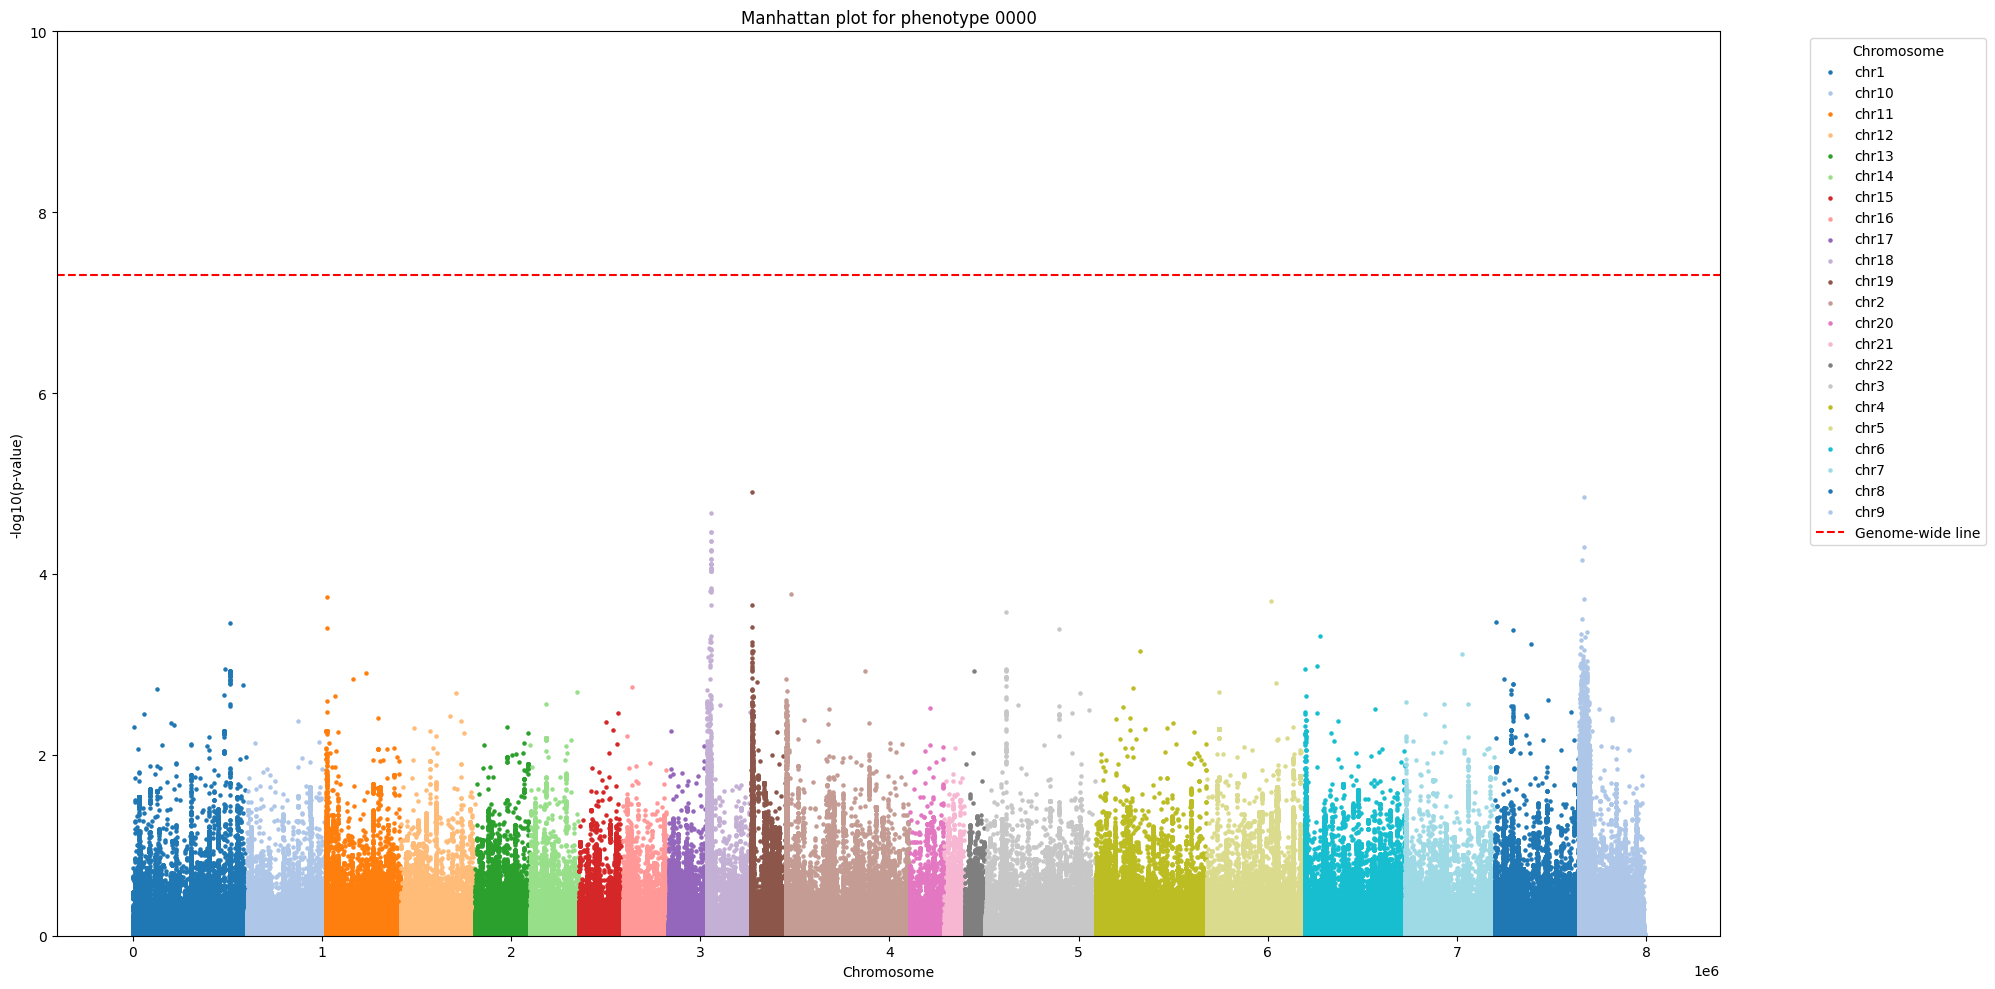

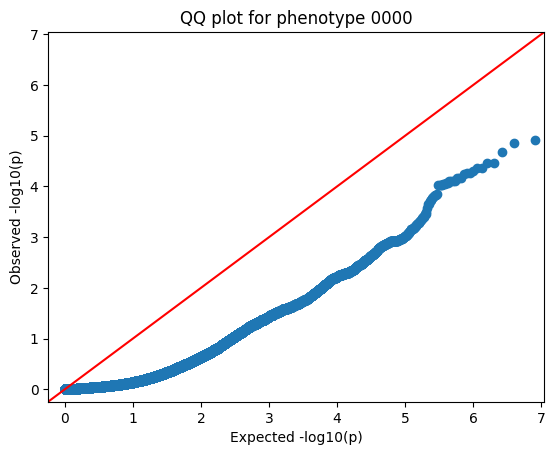

Phenotype 1: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312  0.028184  0.977515   
1                 T          hg38   0.011650          312 -0.143063  0.886241   
2                 C          hg38   0.122330          312 -0.006574  0.994755   
3                 C          hg38   0.026214          312 -0.123318  0.901855   
4                 C          hg38   0.021359          312 -0.089845  0.928410   

   effect_size  standard_err

/tmp/ipykernel_4162487/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


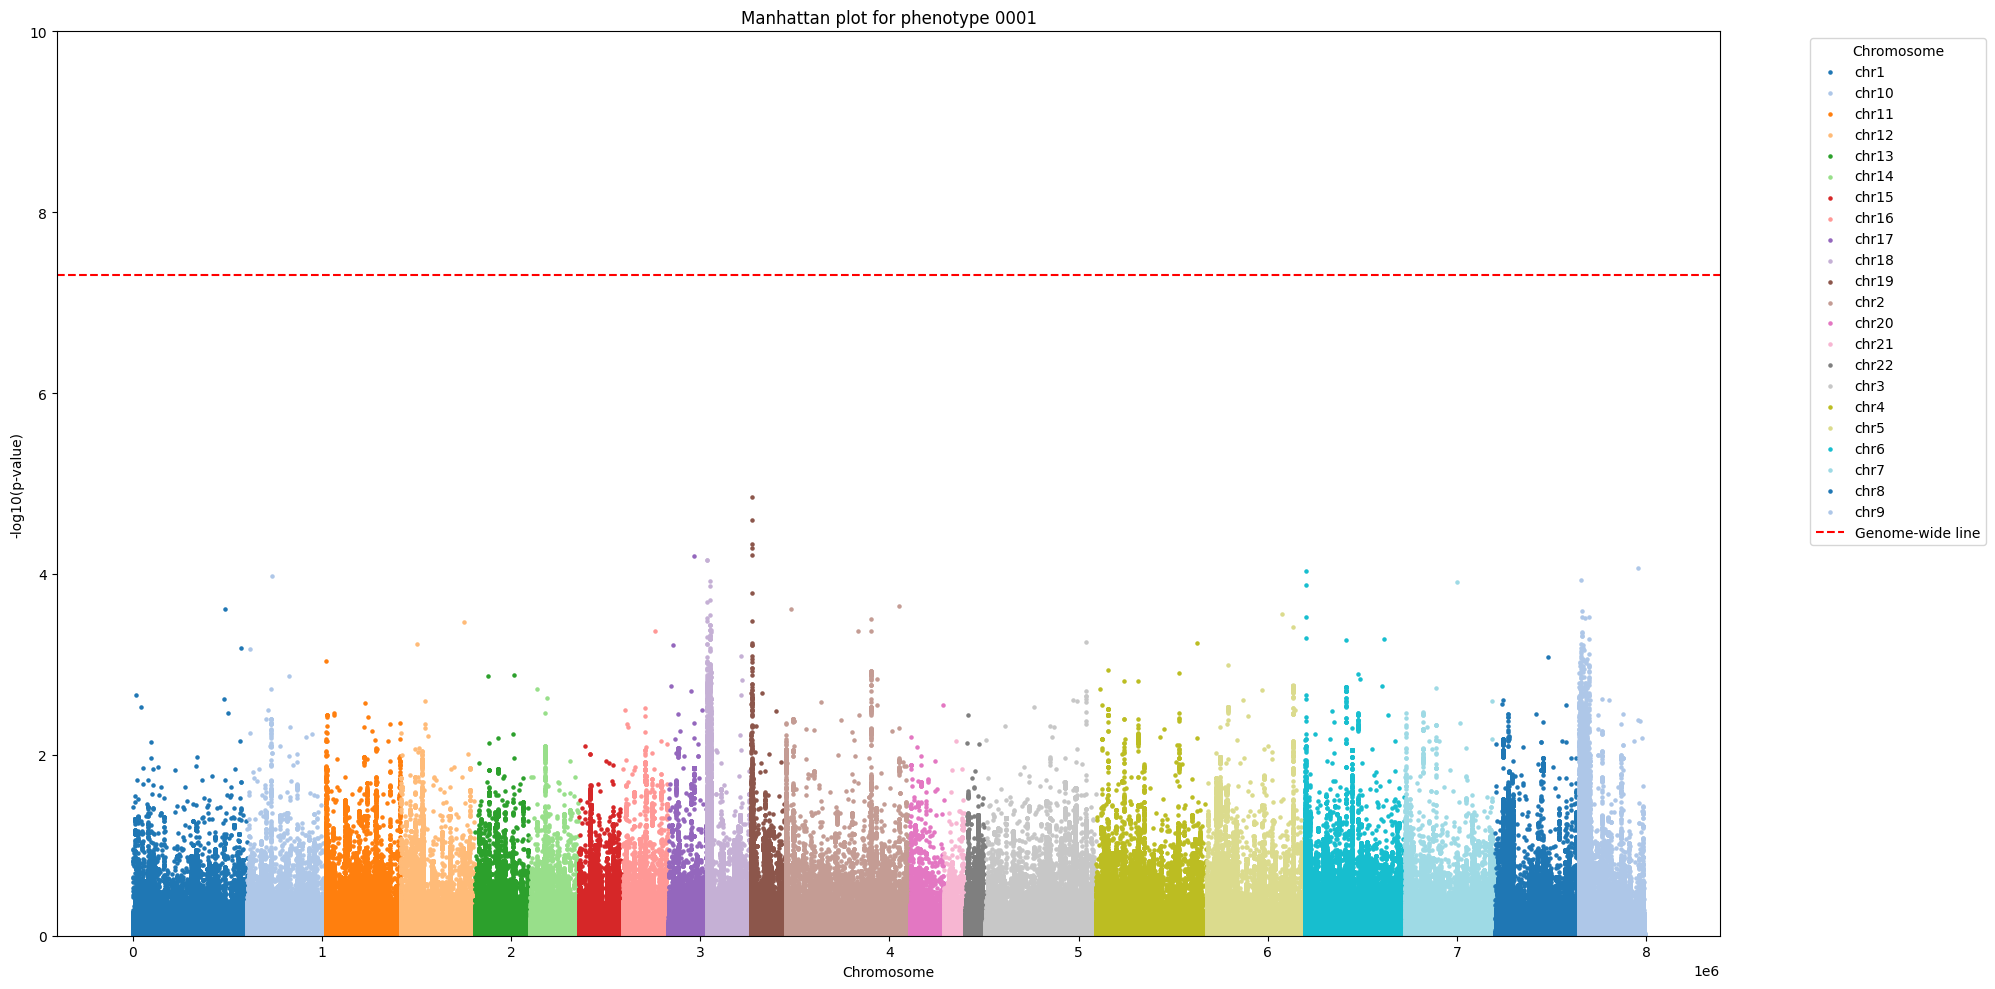

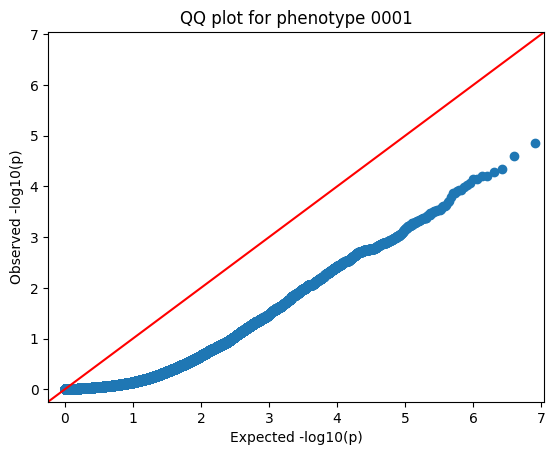

Phenotype 2: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312  0.017666  0.985905   
1                 T          hg38   0.011650          312 -0.067570  0.946128   
2                 C          hg38   0.122330          312 -0.005080  0.995946   
3                 C          hg38   0.026214          312 -0.042009  0.966491   
4                 C          hg38   0.021359          312 -0.026705  0.978695   

   effect_size  standard_err

/tmp/ipykernel_4162487/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


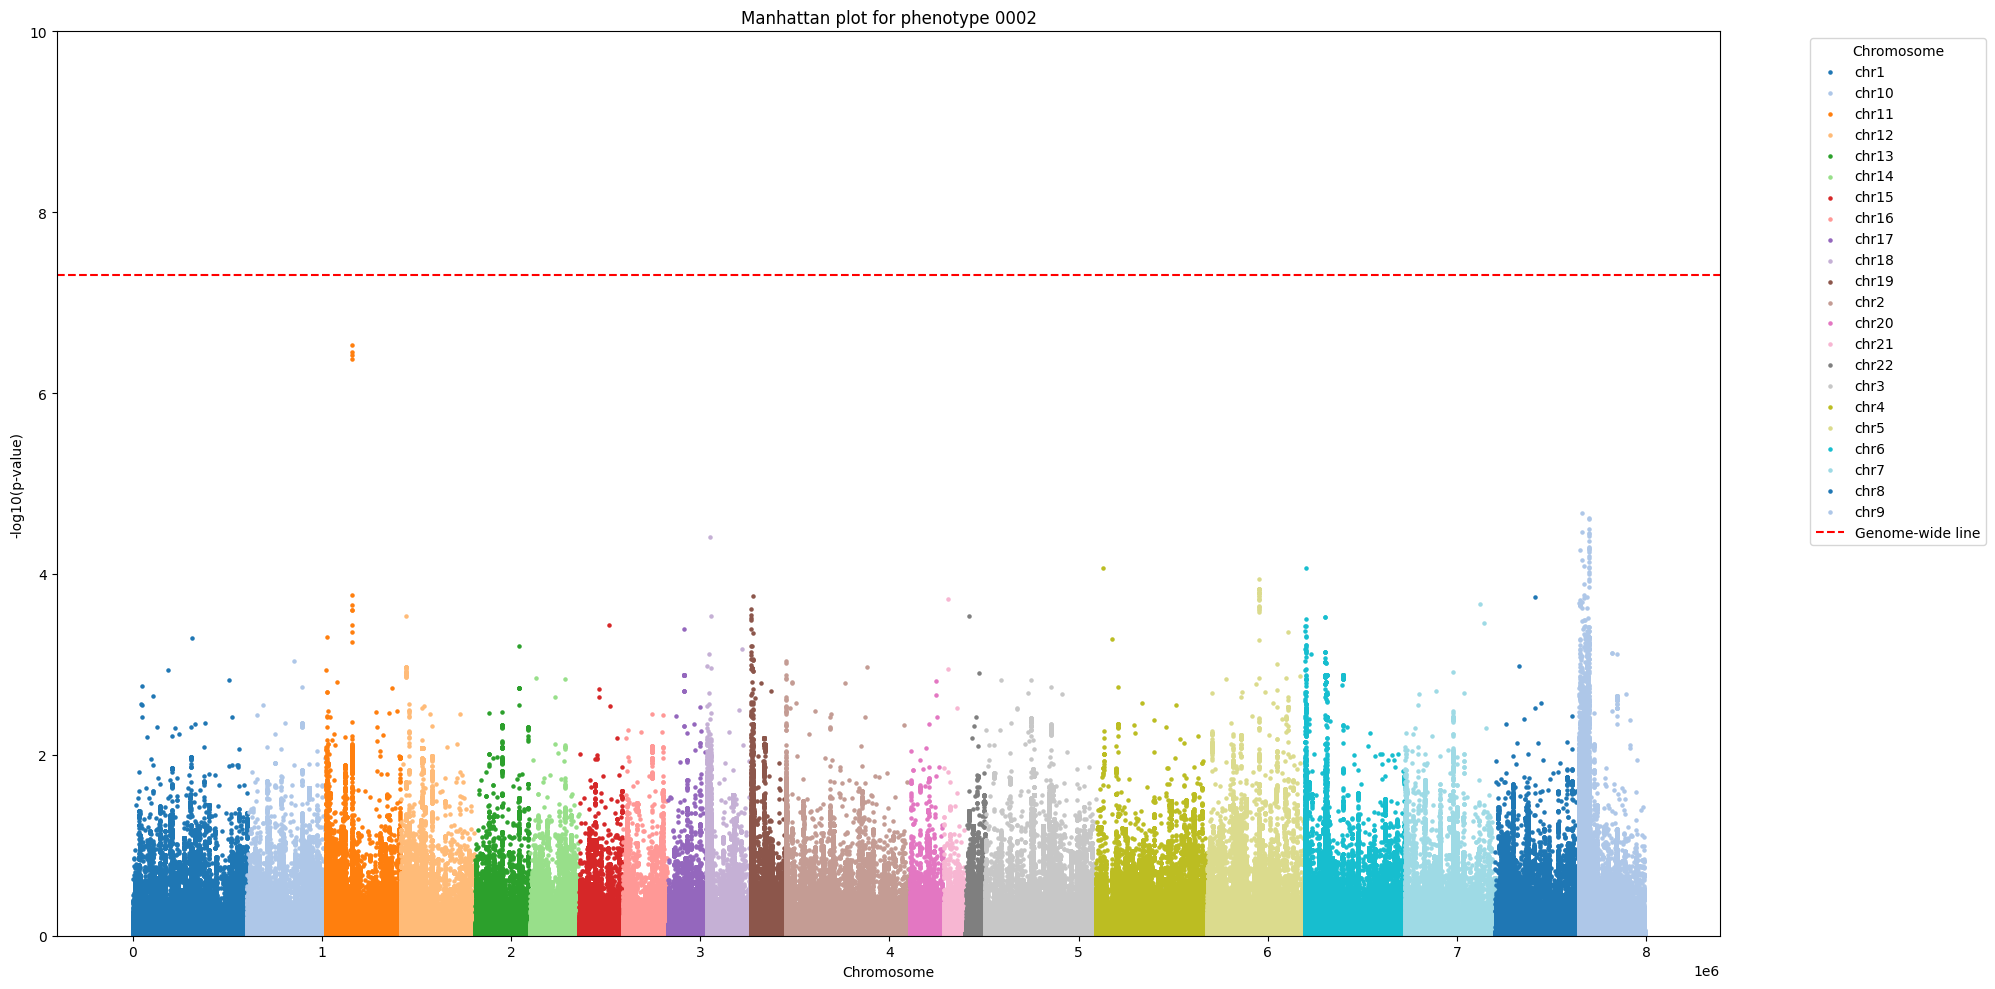

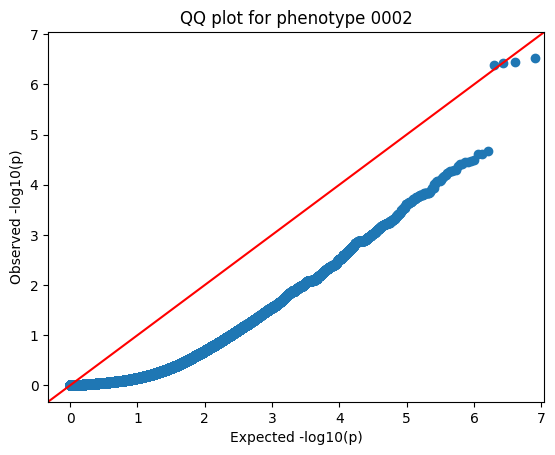

Phenotype 3: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312 -0.005913  0.995282   
1                 T          hg38   0.011650          312  0.010706  0.991458   
2                 C          hg38   0.122330          312 -0.000674  0.999462   
3                 C          hg38   0.026214          312  0.012543  0.989992   
4                 C          hg38   0.021359          312  0.012060  0.990377   

   effect_size  standard_err

/tmp/ipykernel_4162487/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


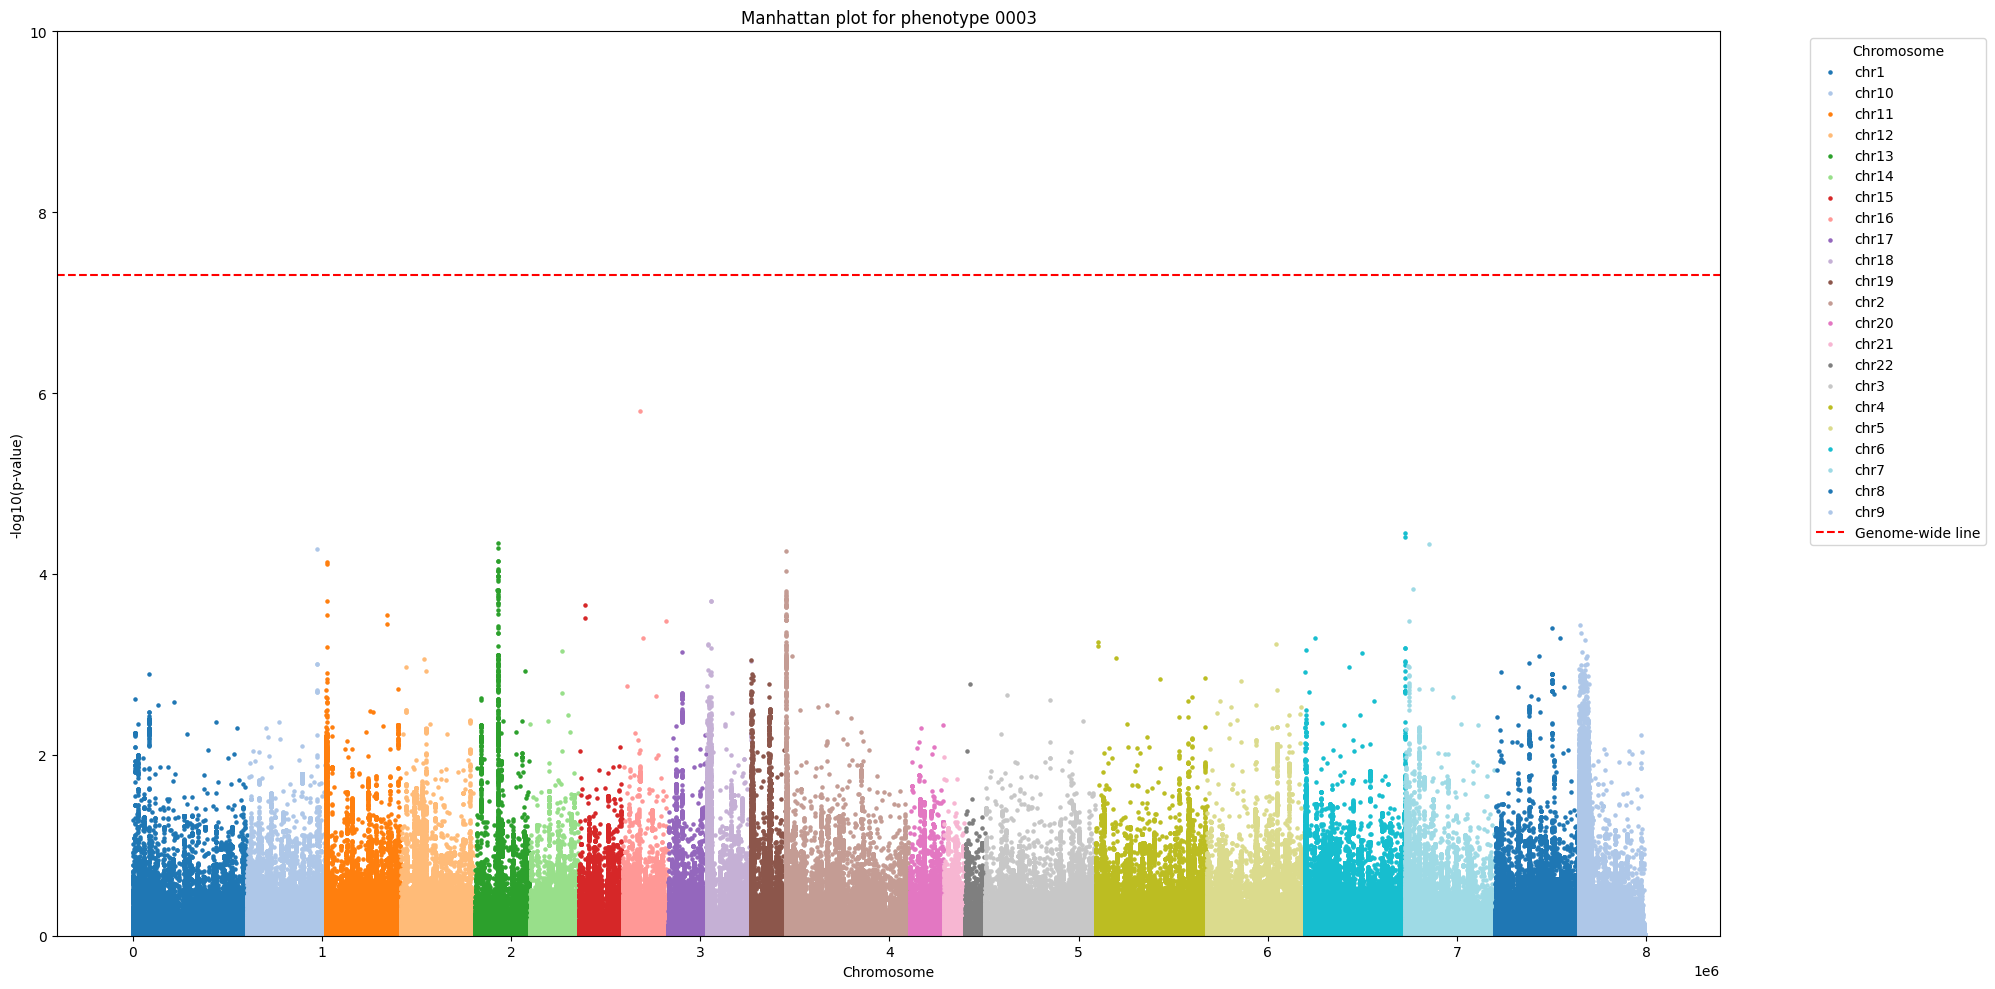

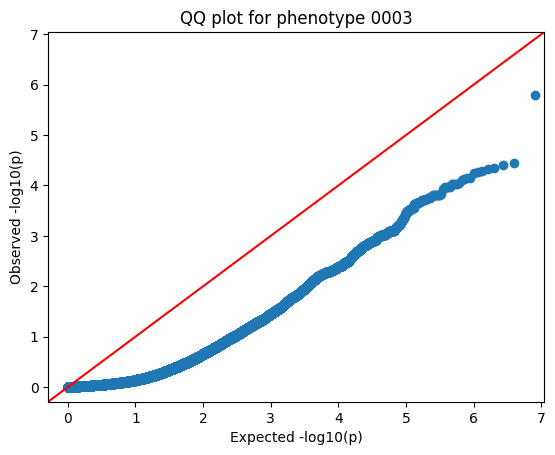

Phenotype 4: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312  0.001916  0.998471   
1                 T          hg38   0.011650          312  0.030188  0.975917   
2                 C          hg38   0.122330          312  0.001657  0.998678   
3                 C          hg38   0.026214          312  0.032122  0.974375   
4                 C          hg38   0.021359          312  0.022048  0.982409   

   effect_size  standard_err

/tmp/ipykernel_4162487/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


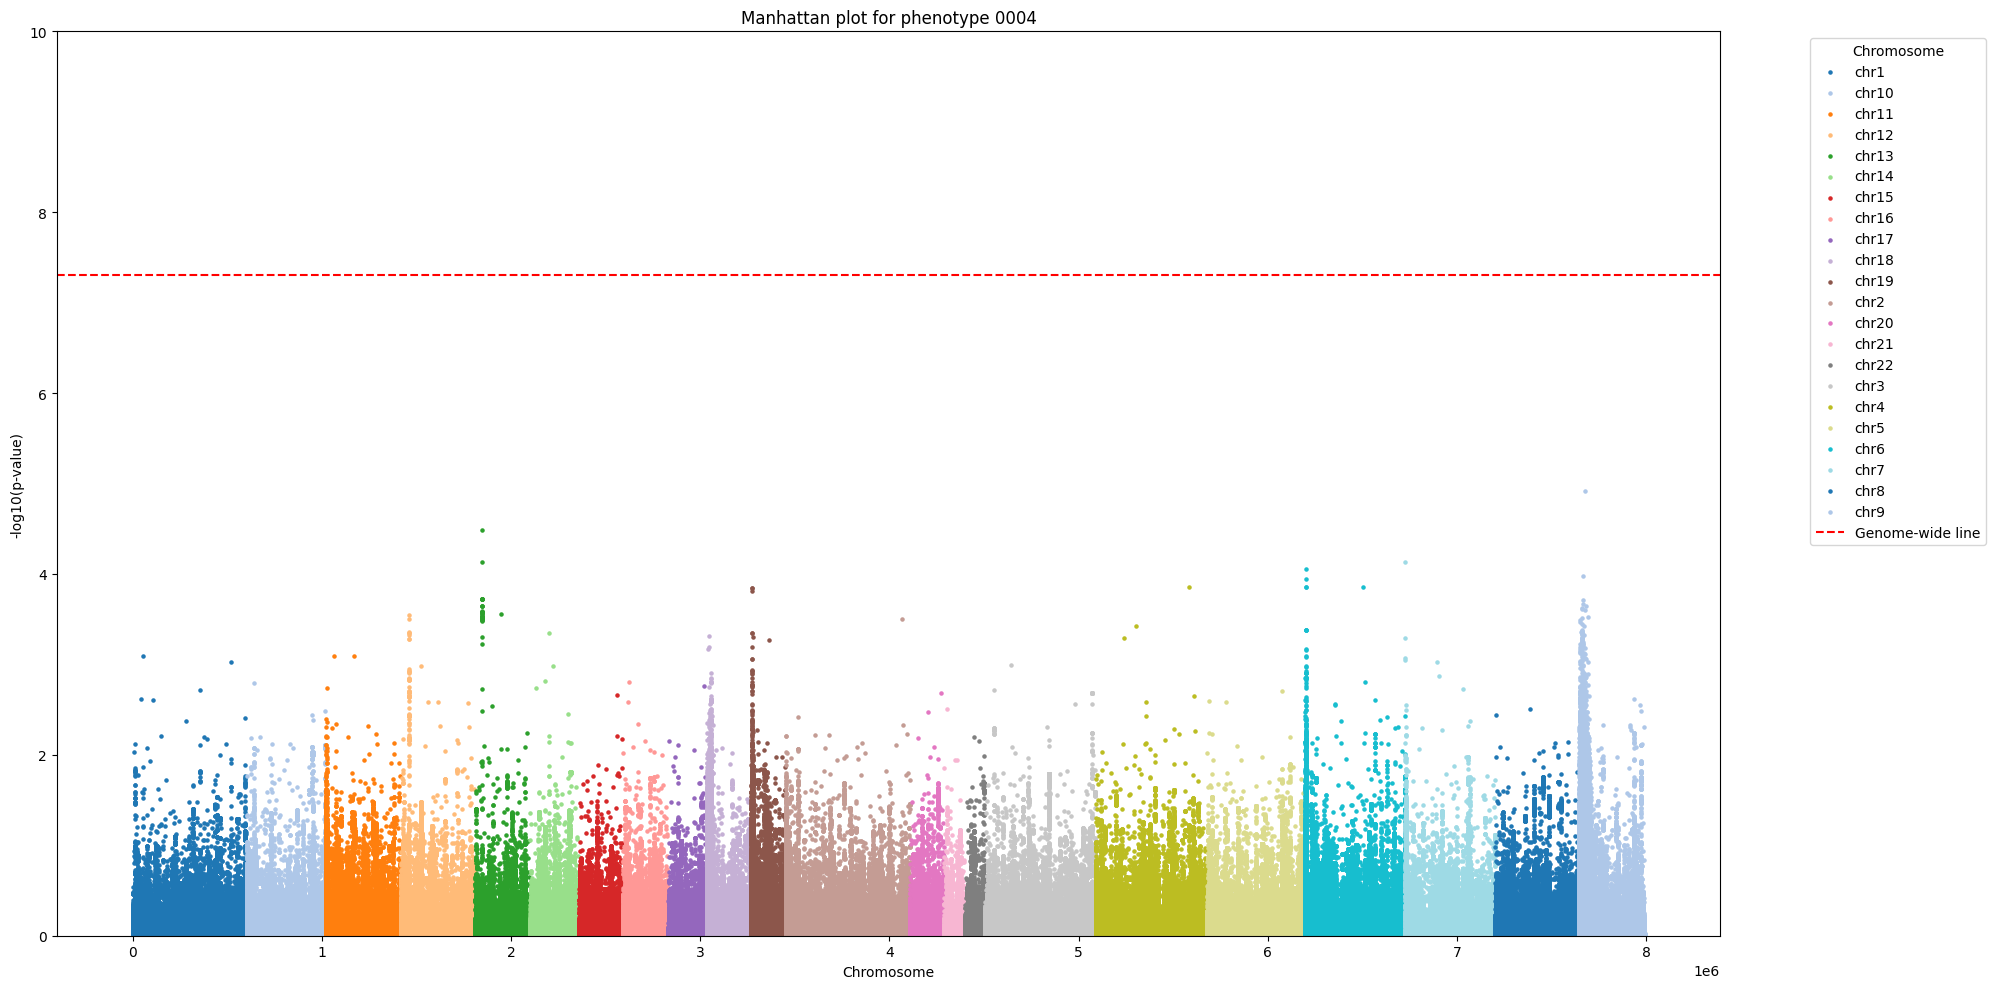

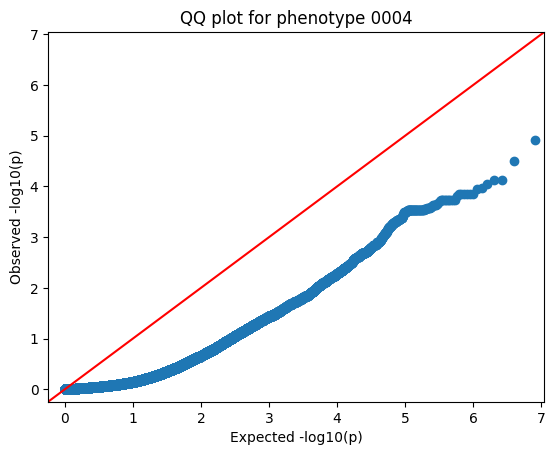

In [6]:
num_rand_phenotypes = 5

for phenotype in range(num_rand_phenotypes):
    filename = f"random.pheno{phenotype:04d}.glm-imputed.txt.gz"
    
    # Load data
    gwas = load_gwas_data(filename)
    print(f"Phenotype {phenotype}: Dimensions = {gwas.shape}")
    print(gwas.head())
    
    # Manhattan plot
    plot_manhattan(
        gwas,
        chr_col="chromosome",
        bp_col="position",
        p_col="pvalue",
        snp_col="variant_id",
        title=f"Manhattan plot for phenotype {phenotype:04d}"
    )
    
    # QQ plot
    plot_qq(gwas["pvalue"], title=f"QQ plot for phenotype {phenotype:04d}")
